In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats 
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
"""Load dataset in a DataFrame"""
df = pd.read_csv(r'../../data/API/api_dataset_professional_games_better.csv')
df

,match_id,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,...,radiant_str,radiant_int,radiant_agi,radiant_melee,radiant_ranged,dire_str,dire_int,dire_agi,dire_melee,dire_ranged
0,5792362494,1,0,0,0,0,0,0,0,0,...,0.2,0.4,0.4,0.2,0.8,0.2,0.6,0.2,0.2,0.8
1,5794821137,-1,0,0,0,-1,1,0,0,0,...,0.4,0.4,0.2,0.4,0.6,0.4,0.4,0.2,0.6,0.4
2,5790226407,1,0,0,0,0,0,0,0,0,...,0.2,0.2,0.6,0.4,0.6,0.6,0.2,0.2,0.6,0.4
3,5790375758,1,0,0,0,0,0,0,0,0,...,0.4,0.6,0.0,0.4,0.6,0.4,0.4,0.2,0.6,0.4
4,5790649968,-1,0,0,0,0,0,0,0,0,...,0.4,0.6,0.0,0.4,0.6,0.8,0.0,0.2,0.8,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12381,6437920662,1,0,0,0,0,0,0,0,0,...,0.4,0.4,0.2,0.6,0.4,0.4,0.4,0.2,0.6,0.4
12382,6453048875,-1,0,0,0,0,0,0,0,0,...,0.2,0.4,0.4,0.4,0.6,0.2,0.4,0.4,0.2,0.8
12383,6409570374,-1,0,0,-1,0,0,0,0,0,...,0.2,0.2,0.6,0.4,0.6,0.2,0.8,0.0,0.4,0.6
12384,6437061441,-1,1,0,0,0,0,0,0,0,...,0.4,0.2,0.4,0.4,0.6,0.4,0.6,0.0,0.4,0.6


In [5]:
# check missing data
df.isnull().values.any()

False

In [6]:
# delete cluster_id
df.drop(['match_id'], axis=1, inplace=True)

In [5]:
# sns.set(rc = {'figure.figsize':(5,5)})
# sns.countplot(data=df, x='game_mode')

In [6]:
# sns.set(rc = {'figure.figsize':(5,5)})
# sns.countplot(data=df, x='game_type')

In [8]:
#group1 winning team: 1; gropu2 winning team: -1
group1 = df[df["match_result"] == 1]
group2 = df[df["match_result"] == -1]

In [9]:
group1

,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,...,radiant_str,radiant_int,radiant_agi,radiant_melee,radiant_ranged,dire_str,dire_int,dire_agi,dire_melee,dire_ranged
0,1,0,0,0,0,0,0,0,0,0,...,0.2,0.4,0.4,0.2,0.8,0.2,0.6,0.2,0.2,0.8
2,1,0,0,0,0,0,0,0,0,0,...,0.2,0.2,0.6,0.4,0.6,0.6,0.2,0.2,0.6,0.4
3,1,0,0,0,0,0,0,0,0,0,...,0.4,0.6,0.0,0.4,0.6,0.4,0.4,0.2,0.6,0.4
5,1,1,0,0,0,0,0,0,0,0,...,0.0,0.4,0.6,0.6,0.4,0.4,0.2,0.4,0.6,0.4
6,1,0,0,0,0,0,0,0,0,0,...,0.6,0.2,0.2,0.8,0.2,0.4,0.2,0.4,0.6,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,1,-1,0,0,0,0,0,0,0,0,...,0.4,0.2,0.4,0.4,0.6,0.2,0.6,0.2,0.4,0.6
12378,1,0,0,0,0,0,0,0,0,0,...,0.4,0.6,0.0,0.4,0.6,0.4,0.4,0.2,0.2,0.8
12379,1,0,0,-1,0,0,0,0,0,0,...,0.4,0.6,0.0,0.4,0.6,0.4,0.4,0.2,0.4,0.6
12381,1,0,0,0,0,0,0,0,0,0,...,0.4,0.4,0.2,0.6,0.4,0.4,0.4,0.2,0.6,0.4


In [10]:
group2

,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,...,radiant_str,radiant_int,radiant_agi,radiant_melee,radiant_ranged,dire_str,dire_int,dire_agi,dire_melee,dire_ranged
1,-1,0,0,0,-1,1,0,0,0,0,...,0.4,0.4,0.2,0.4,0.6,0.4,0.4,0.2,0.6,0.4
4,-1,0,0,0,0,0,0,0,0,0,...,0.4,0.6,0.0,0.4,0.6,0.8,0.0,0.2,0.8,0.2
8,-1,0,0,0,0,0,0,0,0,0,...,0.4,0.2,0.4,0.4,0.6,0.6,0.4,0.0,0.6,0.4
9,-1,0,0,0,0,0,0,1,1,0,...,0.4,0.4,0.2,0.8,0.2,0.2,0.4,0.4,0.2,0.8
10,-1,0,0,0,0,0,0,-1,0,0,...,0.2,0.4,0.4,0.2,0.8,0.4,0.2,0.4,0.8,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12376,-1,0,-1,0,0,0,0,0,0,0,...,0.2,0.6,0.2,0.6,0.4,0.4,0.4,0.2,0.2,0.8
12380,-1,0,0,0,0,0,0,0,0,0,...,0.4,0.4,0.2,0.4,0.6,0.0,0.6,0.4,0.2,0.8
12382,-1,0,0,0,0,0,0,0,0,0,...,0.2,0.4,0.4,0.4,0.6,0.2,0.4,0.4,0.2,0.8
12383,-1,0,0,-1,0,0,0,0,0,0,...,0.2,0.2,0.6,0.4,0.6,0.2,0.8,0.0,0.4,0.6


<AxesSubplot:>

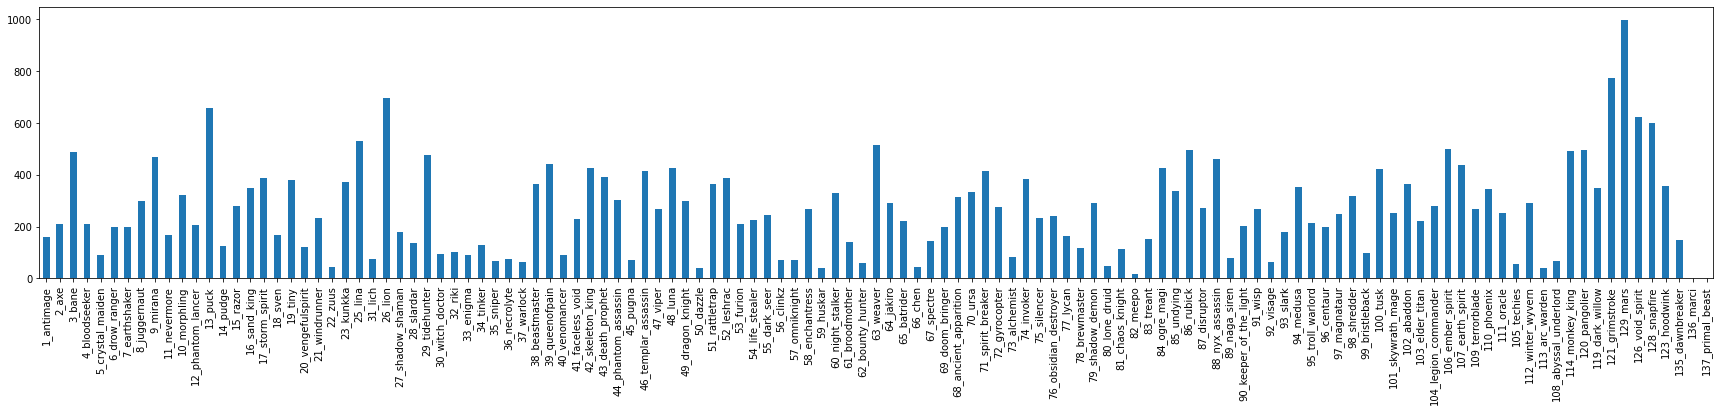

In [11]:
# group1 winning team heroes 
count_group1_winning = group1[group1 == 1].sum(axis=0)[1:124]
count_group1_winning.plot.bar(figsize=(30,5))

<AxesSubplot:>

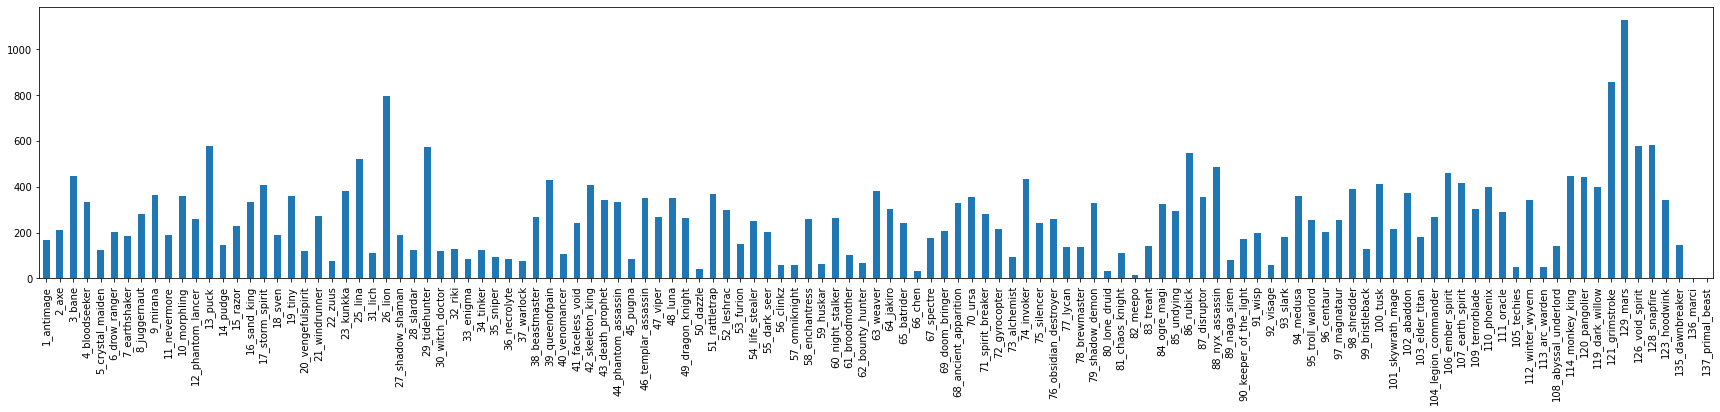

In [12]:
# group1 losing team heroes
count_group1_losing = group1[group1 == -1].sum(axis=0)[1:124]
count_group1_losing.abs().plot.bar(figsize=(30,5))

<AxesSubplot:>

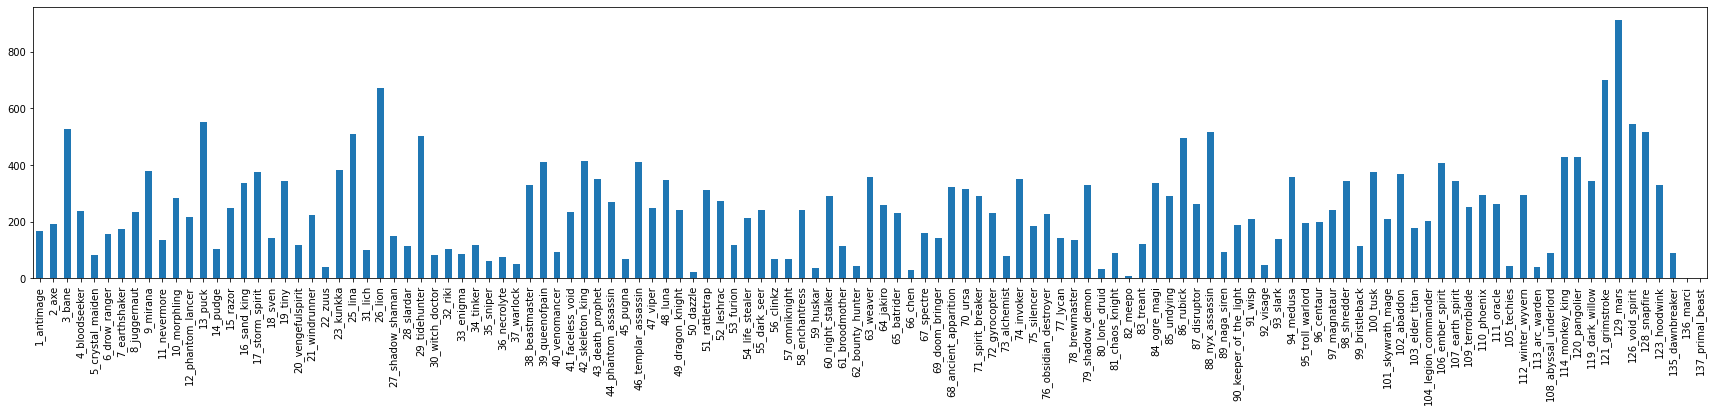

In [13]:
# group2 winning team heroes
count_group2_winning = group2[group2 == -1].sum(axis=0)[1:124]
count_group2_winning.abs().plot.bar(figsize=(30,5))

<AxesSubplot:>

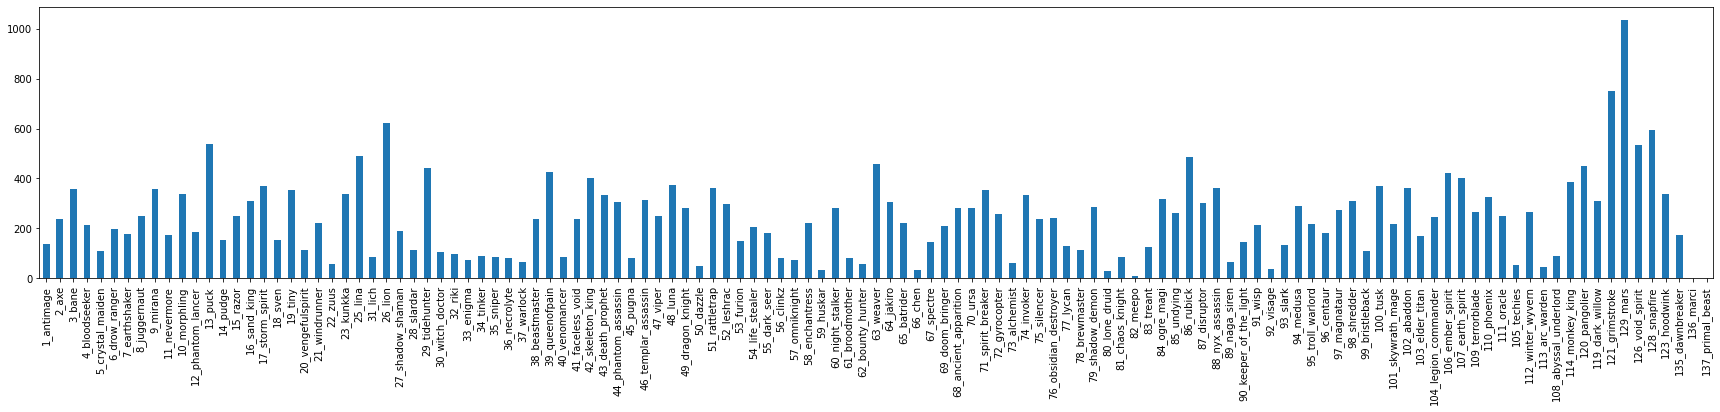

In [14]:
# group2 losing team heroes
count_group2_losing = group2[group2 == 1].sum(axis=0)[1:124]
count_group2_losing.plot.bar(figsize=(30,5))

In [75]:
count_all_winning = count_group1_winning + count_group2_winning.abs()
df_count_all_winning = count_all_winning.to_frame()
df_count_all_winning = df_count_all_winning.rename(columns={0:'Count'})
# df_count_all_winning['Count'].value_counts(normalize=True)
df_count_all_winning['Percentage'] = df_count_all_winning['Count'] / df_count_all_winning['Count'].sum()
df_count_all_winning


,Count,Percentage
1_antimage,328.0,0.005296
2_axe,401.0,0.006475
3_bane,1015.0,0.016389
4_bloodseeker,449.0,0.007250
5_crystal_maiden,174.0,0.002810
...,...,...
128_snapfire,1116.0,0.018020
123_hoodwink,685.0,0.011061
135_dawnbreaker,239.0,0.003859
136_marci,0.0,0.000000


<AxesSubplot:>

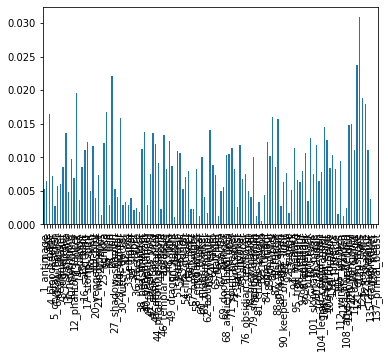

In [78]:
df1['Percentage'].plot.bar()
# count all winning 
count_all_winning.plot.bar(figsize=(30,5))
plt.title('Heroes counts in winning teams', fontsize=16)
plt.legend(['Usage count'], fontsize=14)
plt.xlabel('Heroes', fontsize=16)

Text(0.5, 0, 'Heroes')

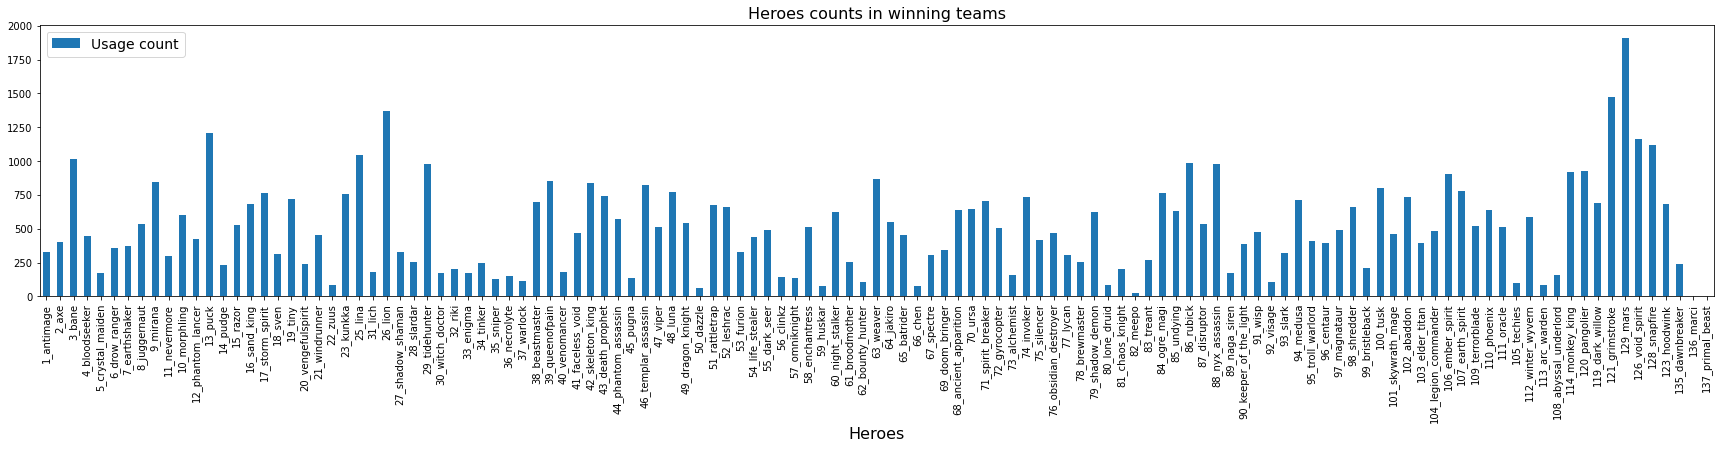

In [72]:
# count all winning 
count_all_winning = count_group1_winning + count_group2_winning.abs()
count_all_winning.plot.bar(figsize=(30,5))
plt.title('Heroes counts in winning teams', fontsize=16)
plt.legend(['Usage count'], fontsize=14)
plt.xlabel('Heroes', fontsize=16)


Text(0.5, 0, 'Heroes')

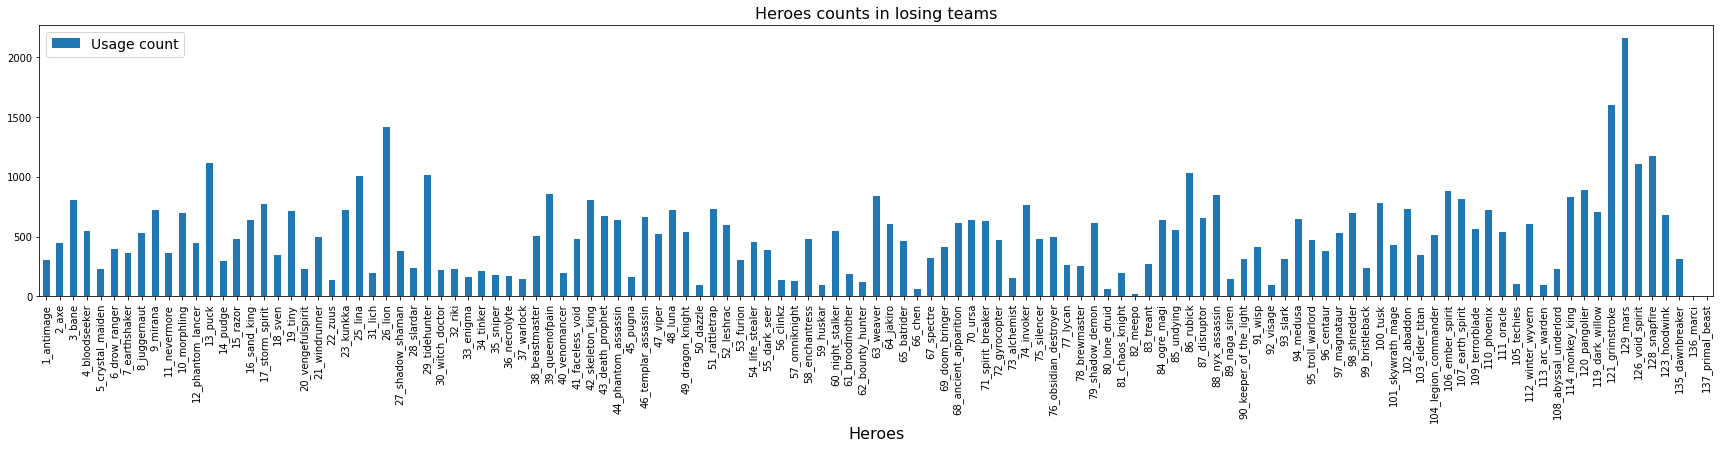

In [61]:
# count all losing
count_all_losing = count_group1_losing.abs() + count_group2_losing
count_all_losing.plot.bar(figsize=(30,5))
plt.title('Heroes counts in losing teams', fontsize=16)
plt.legend(['Usage count'], fontsize=14)
plt.xlabel('Heroes', fontsize=16)

In [16]:
#top 10 used heroes between winning and losing (among all groups)
print('winning team heroes counts')
print(count_all_winning.nlargest(n=10))
print('\n')
print('losing team heroes counts')
print(count_all_losing.nlargest(n=10))

winning team heroes counts
129_mars           1912.0
121_grimstroke     1471.0
26_lion            1369.0
13_puck            1209.0
126_void_spirit    1166.0
128_snapfire       1116.0
25_lina            1041.0
3_bane             1015.0
86_rubick           988.0
29_tidehunter       979.0
dtype: float64


losing team heroes counts
129_mars           2165.0
121_grimstroke     1605.0
26_lion            1419.0
128_snapfire       1176.0
13_puck            1115.0
126_void_spirit    1111.0
86_rubick          1030.0
29_tidehunter      1017.0
25_lina            1008.0
120_pangolier       892.0
dtype: float64


In [17]:
#group1 heroes
group1_heroes = group1.iloc[:,1:124]
group1_heroes

,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,11_nevermore,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12378,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
12379,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12381,0,0,0,0,0,0,0,0,0,0,...,0,1,-1,0,0,0,0,0,0,0


In [18]:
# group2 heroes
group2_heroes = group2.iloc[:,1:124]
group2_heroes

,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,11_nevermore,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
1,0,0,0,-1,1,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
9,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
10,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12376,0,-1,0,0,0,0,0,0,0,0,...,0,-1,1,0,0,0,0,0,0,0
12380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
12382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
12383,0,0,-1,0,0,0,0,0,0,0,...,0,0,-1,0,1,0,1,0,0,0


In [19]:
# Get winning heroes combination from group1
gp1_winning_heroes = []
for row in range(len(group1_heroes)):
  combination = []
  for col in group1_heroes:
    if group1.iloc[row][col] == 1:
      hero = col
      combination.append(hero)
  gp1_winning_heroes.append(tuple(combination))
print(len(gp1_winning_heroes))


6490


In [20]:
# Count winning combinations in group1
counts_gp1Combination_win = pd.Series(tuple(gp1_winning_heroes)).value_counts()
print(counts_gp1Combination_win.nlargest(n=10))

(2_axe, 26_lion, 42_skeleton_king, 74_invoker, 102_abaddon)                                3
(19_tiny, 71_spirit_breaker, 91_wisp, 94_medusa, 100_tusk)                                 2
(17_storm_spirit, 26_lion, 54_life_stealer, 98_shredder, 121_grimstroke)                   2
(13_puck, 38_beastmaster, 84_ogre_magi, 94_medusa, 101_skywrath_mage)                      2
(44_phantom_assassin, 58_enchantress, 71_spirit_breaker, 126_void_spirit, 128_snapfire)    2
(1_antimage, 17_storm_spirit, 26_lion, 37_warlock, 98_shredder)                            2
(11_nevermore, 26_lion, 29_tidehunter, 91_wisp, 103_elder_titan)                           2
(35_sniper, 41_faceless_void, 60_night_stalker, 75_silencer, 112_winter_wyvern)            2
(63_weaver, 79_shadow_demon, 107_earth_spirit, 114_monkey_king, 129_mars)                  2
(39_queenofpain, 48_luna, 71_spirit_breaker, 84_ogre_magi, 121_grimstroke)                 2
dtype: int64


In [21]:
# Get winning heroes combination from group2
gp2_winning_heroes =[]
for row in range(len(group2_heroes)):
  combination = []
  for col in group2_heroes:
    if group2.iloc[row][col] == -1:
      hero = col
      combination.append(hero)
  gp2_winning_heroes.append(tuple(combination))

print(len(gp2_winning_heroes))

5896


In [22]:
# Count the winning combinations in group2
counts_gp2Combination_win = pd.Series(gp2_winning_heroes).value_counts()
print(counts_gp2Combination_win.nlargest(n=10))

(19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur)            3
(49_dragon_knight, 54_life_stealer, 58_enchantress, 74_invoker, 112_winter_wyvern)    2
(44_phantom_assassin, 58_enchantress, 65_batrider, 97_magnataur, 100_tusk)            2
(17_storm_spirit, 42_skeleton_king, 43_death_prophet, 86_rubick, 129_mars)            2
(4_bloodseeker, 13_puck, 28_slardar, 86_rubick, 121_grimstroke)                       2
(26_lion, 77_lycan, 95_troll_warlord, 98_shredder, 110_phoenix)                       2
(9_mirana, 29_tidehunter, 66_chen, 89_naga_siren, 106_ember_spirit)                   2
(17_storm_spirit, 55_dark_seer, 67_spectre, 88_nyx_assassin, 110_phoenix)             2
(13_puck, 26_lion, 85_undying, 109_terrorblade, 129_mars)                             2
(3_bane, 44_phantom_assassin, 86_rubick, 106_ember_spirit, 129_mars)                  2
dtype: int64


In [23]:
# Get losing heroes combination from group1
gp1_losing_heroes =[]
for row in range(len(group1_heroes)):
  combination = []
  for col in group1_heroes:
    if group1.iloc[row][col] == -1:
      hero = col
      combination.append(hero)
  gp1_losing_heroes.append(tuple(combination))

print(len(gp1_losing_heroes))

6490


In [24]:
# Count losing combinations in group1
counts_gp1Combination_lose = pd.Series(gp1_losing_heroes).value_counts()
print(counts_gp1Combination_lose.nlargest(n=10))

(25_lina, 42_skeleton_king, 58_enchantress, 110_phoenix, 120_pangolier)             2
(26_lion, 29_tidehunter, 52_leshrac, 91_wisp, 103_elder_titan)                      2
(26_lion, 48_luna, 102_abaddon, 106_ember_spirit, 129_mars)                         2
(9_mirana, 13_puck, 28_slardar, 99_bristleback, 114_monkey_king)                    2
(16_sand_king, 19_tiny, 119_dark_willow, 121_grimstroke, 126_void_spirit)           2
(4_bloodseeker, 28_slardar, 74_invoker, 114_monkey_king, 128_snapfire)              2
(27_shadow_shaman, 43_death_prophet, 85_undying, 113_arc_warden, 129_mars)          2
(1_antimage, 19_tiny, 64_jakiro, 97_magnataur, 112_winter_wyvern)                   2
(42_skeleton_king, 43_death_prophet, 107_earth_spirit, 121_grimstroke, 129_mars)    2
(5_crystal_maiden, 27_shadow_shaman, 29_tidehunter, 63_weaver, 106_ember_spirit)    2
dtype: int64


In [25]:
# Get losing heroes combination from group2
gp2_losing_heroes =[]
for row in range(len(group2_heroes)):
  combination = []
  for col in group2_heroes:
    if group2.iloc[row][col] == 1:
      hero = col
      combination.append(hero)
  gp2_losing_heroes.append(tuple(combination))

print(len(gp2_losing_heroes))

5896


In [26]:
# Count losing combinations in group2
counts_gp2Combination_lose = pd.Series(gp2_losing_heroes).value_counts()
print(counts_gp2Combination_lose.nlargest(n=10))

(13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire)               3
(13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke)                     3
(46_templar_assassin, 60_night_stalker, 67_spectre, 88_nyx_assassin, 128_snapfire)      2
(2_axe, 6_drow_ranger, 26_lion, 49_dragon_knight, 103_elder_titan)                      2
(9_mirana, 46_templar_assassin, 97_magnataur, 104_legion_commander, 111_oracle)         2
(8_juggernaut, 21_windrunner, 23_kunkka, 27_shadow_shaman, 129_mars)                    2
(26_lion, 48_luna, 107_earth_spirit, 108_abyssal_underlord, 126_void_spirit)            2
(23_kunkka, 30_witch_doctor, 94_medusa, 96_centaur, 119_dark_willow)                    2
(17_storm_spirit, 29_tidehunter, 54_life_stealer, 63_weaver, 87_disruptor)              2
(10_morphling, 76_obsidian_destroyer, 107_earth_spirit, 111_oracle, 126_void_spirit)    2
dtype: int64


In [27]:
# Sum winning combinations from group1 and group2 
combine_group_winning = gp1_winning_heroes + gp2_winning_heroes
counts_combine_group_winning = pd.Series(combine_group_winning).value_counts()
print(counts_combine_group_winning.nlargest(n=10))

(2_axe, 26_lion, 42_skeleton_king, 74_invoker, 102_abaddon)                   4
(19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur)    3
(19_tiny, 71_spirit_breaker, 91_wisp, 94_medusa, 100_tusk)                    2
(11_nevermore, 26_lion, 29_tidehunter, 91_wisp, 103_elder_titan)              2
(1_antimage, 9_mirana, 29_tidehunter, 52_leshrac, 84_ogre_magi)               2
(44_phantom_assassin, 58_enchantress, 65_batrider, 97_magnataur, 100_tusk)    2
(19_tiny, 51_rattletrap, 52_leshrac, 66_chen, 95_troll_warlord)               2
(39_queenofpain, 48_luna, 71_spirit_breaker, 84_ogre_magi, 121_grimstroke)    2
(25_lina, 48_luna, 49_dragon_knight, 74_invoker, 112_winter_wyvern)           2
(13_puck, 26_lion, 48_luna, 102_abaddon, 120_pangolier)                       2
dtype: int64


In [28]:
# Sum losing combinations from group1 and group2
combine_group_losing = gp1_losing_heroes + gp2_losing_heroes
counts_combine_group_losing = pd.Series(combine_group_losing).value_counts()
print(counts_combine_group_losing.nlargest(n=10))

(13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke)                          3
(13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire)                    3
(2_axe, 6_drow_ranger, 26_lion, 49_dragon_knight, 103_elder_titan)                           2
(17_storm_spirit, 76_obsidian_destroyer, 107_earth_spirit, 109_terrorblade, 128_snapfire)    2
(27_shadow_shaman, 43_death_prophet, 85_undying, 113_arc_warden, 129_mars)                   2
(8_juggernaut, 21_windrunner, 23_kunkka, 27_shadow_shaman, 129_mars)                         2
(25_lina, 42_skeleton_king, 58_enchantress, 110_phoenix, 120_pangolier)                      2
(39_queenofpain, 44_phantom_assassin, 51_rattletrap, 110_phoenix, 129_mars)                  2
(65_batrider, 74_invoker, 91_wisp, 94_medusa, 110_phoenix)                                   2
(9_mirana, 46_templar_assassin, 97_magnataur, 104_legion_commander, 111_oracle)              2
dtype: int64


In [29]:
# Demonstrate counts and percentage of winning team combinations
df_winning_combinations = counts_combine_group_winning.to_frame()
df_winning_combinations  = df_winning_combinations .rename(columns={0:'Count'})

df_winning_combinations ['Percentage'] = (df_winning_combinations ['Count'] / df_winning_combinations ['Count'].sum()) * 100 
df_winning_combinations 


,Count,Percentage
"(2_axe, 26_lion, 42_skeleton_king, 74_invoker, 102_abaddon)",4,0.032295
"(19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur)",3,0.024221
"(19_tiny, 71_spirit_breaker, 91_wisp, 94_medusa, 100_tusk)",2,0.016147
"(11_nevermore, 26_lion, 29_tidehunter, 91_wisp, 103_elder_titan)",2,0.016147
"(1_antimage, 9_mirana, 29_tidehunter, 52_leshrac, 84_ogre_magi)",2,0.016147
...,...,...
"(16_sand_king, 60_night_stalker, 75_silencer, 86_rubick, 114_monkey_king)",1,0.008074
"(34_tinker, 40_venomancer, 61_broodmother, 80_lone_druid, 120_pangolier)",1,0.008074
"(25_lina, 31_lich, 55_dark_seer, 71_spirit_breaker, 114_monkey_king)",1,0.008074
"(16_sand_king, 25_lina, 60_night_stalker, 70_ursa, 85_undying)",1,0.008074


In [30]:
# Demonstrate counts and percentage of winning team combinations
df_losing_combinations = counts_combine_group_losing.to_frame()
df_losing_combinations  = df_losing_combinations.rename(columns={0:'Count'})

df_losing_combinations['Percentage'] = (df_losing_combinations['Count'] / df_losing_combinations['Count'].sum()) * 100 
df_losing_combinations


,Count,Percentage
"(13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke)",3,0.024221
"(13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire)",3,0.024221
"(2_axe, 6_drow_ranger, 26_lion, 49_dragon_knight, 103_elder_titan)",2,0.016147
"(17_storm_spirit, 76_obsidian_destroyer, 107_earth_spirit, 109_terrorblade, 128_snapfire)",2,0.016147
"(27_shadow_shaman, 43_death_prophet, 85_undying, 113_arc_warden, 129_mars)",2,0.016147
...,...,...
"(25_lina, 38_beastmaster, 44_phantom_assassin, 76_obsidian_destroyer, 135_dawnbreaker)",1,0.008074
"(32_riki, 36_necrolyte, 47_viper, 102_abaddon, 114_monkey_king)",1,0.008074
"(25_lina, 42_skeleton_king, 78_brewmaster, 88_nyx_assassin, 103_elder_titan)",1,0.008074
"(3_bane, 4_bloodseeker, 48_luna, 69_doom_bringer, 103_elder_titan)",1,0.008074
